# CVAI SW 02 Übung

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

path = '/exchange/cvai/images/'

## Aufgabe 1: Unscharfmaskierung mittels Wärmeleitungsgleichung

In [5]:
def Show (img):
    print (img.shape, np.min (img), np.max (img))
    pl.imshow (img, cmap = 'gray')

In [6]:
img1 = cv.imread (path + 'lenna-blurred.jpg')

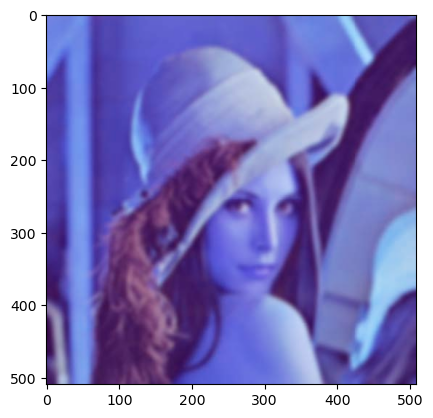

In [3]:
pl.imshow (img1)

Dieses Bild ist unscharf. Verwenden Sie die unscharfe Maskierung um ein schärferes Bild zu berechnen  Konvertieren Sie das Bild vorher auf Graustufen und verarbeiten Sie es so.

Speichern Sie das Original Grauwertbild in der Variablen ub und das geschärfte Bild in der Variablen us.


(509, 509) 0.12156862745098039 0.8823529411764706


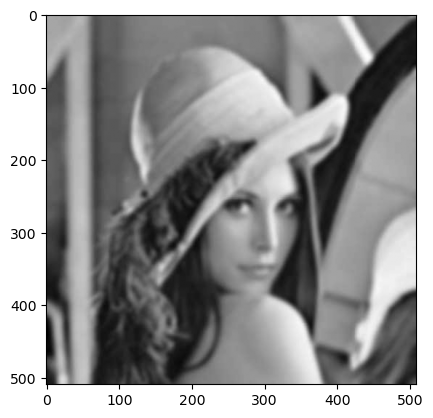

In [7]:
ub = cv.cvtColor (img1, cv.COLOR_BGR2GRAY) / 255.0
Show(ub)

(509, 509) -0.12941176470588256 0.12156862745098052


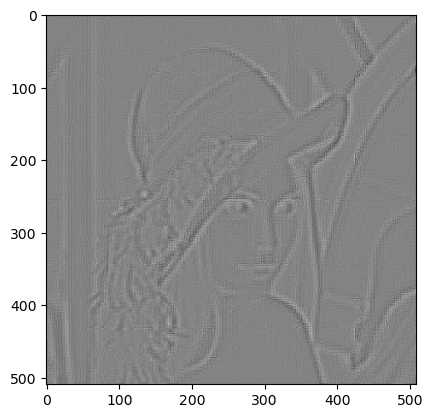

In [8]:
mask = cv.Laplacian (ub, cv.CV_64F, cv.BORDER_DEFAULT)
Show(mask)

In [9]:
c = 3
us = ub - c * mask

(509, 509) 0.12156862745098039 0.8823529411764706
(509, 509) -0.09803921568627455 1.1725490196078425


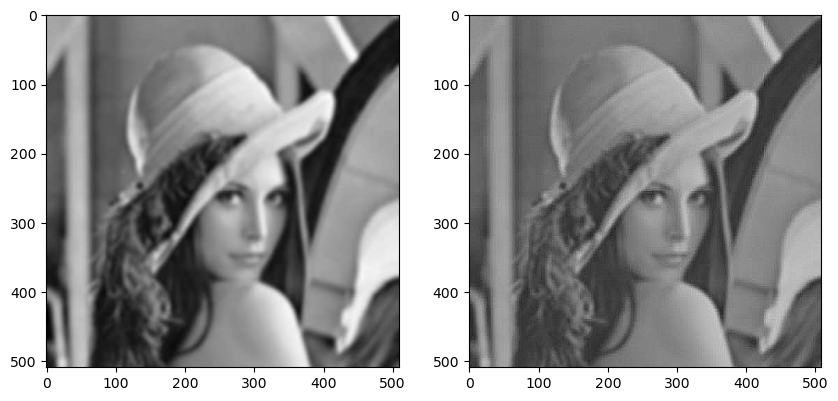

In [10]:
def Show (img):
    print (img.shape, np.min (img), np.max (img))
    pl.imshow (img, cmap = 'gray')
    
pl.figure (figsize = (10, 5))
pl.subplot (1, 2, 1); Show (ub)
pl.subplot (1, 2, 2); Show (us)
np.testing.assert_almost_equal(us[100,100], 0.4156, 0.001)

## Aufgabe 2: Rauschunterdrückung mit Medianfilter

In [11]:
img2 = cv.imread (path + 'gw-test-pattern-noise.jpg')

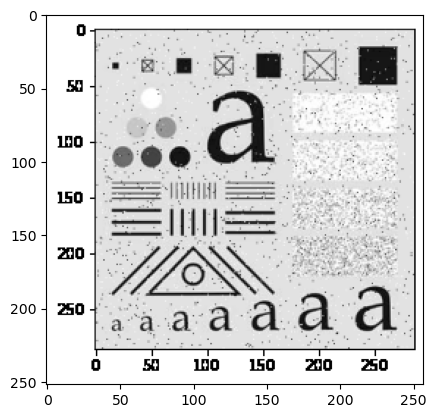

In [12]:
pl.imshow (img2)

Das dargestellte Bild enthält Rauschen. Berechnen Sie ein mit Tiefpass geglättetes Bild (img_blurred) und dann ein mit Medianfilter bearbeitete Bild (img_median)

In [13]:
size = 3
img_blurred = cv.GaussianBlur(img2, (size, size), 0)
img_median = cv.medianBlur(img2, 3)

(252, 257, 3) 0 255
(252, 257, 3) 0 255
(252, 257, 3) 0 255


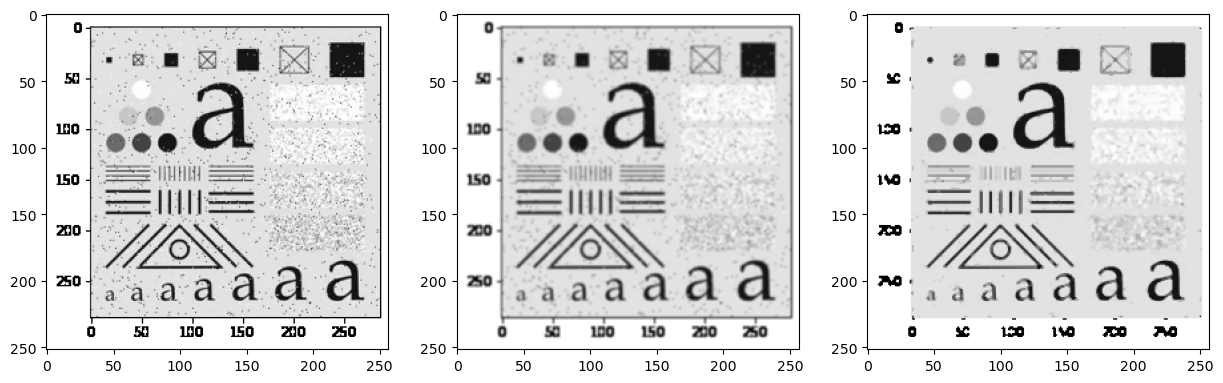

In [14]:
pl.figure (figsize = (15, 5))
pl.subplot (1, 3, 1); Show (img2)
pl.subplot (1, 3, 2); Show (img_blurred)
pl.subplot (1, 3, 3); Show (img_median)